![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Proyecto final - Data Analytics y Business Intelligence

Recibimos dos datasets:

1. `renfe.csv`: Información de búsquedas de billetes que se ha extrajo de la página de Renfe.
2. `coordenadas_ciudades.csv`: Latitud y longitud de provincias españolas.

Queremos usar estos datasets para un modelo de Machine Learning que utilizaremos para predecir los precios de los billetes. Y, para ello, necesitamos limpiar, explorar y pre-procesar el dataset.

## Reglas de juego

1. El proyecto se debe entregar en grupos de dos o individualmente. 
2. Cada respuesta correcta suma un punto.
3. La calificación final consistirá en la suma de todos los puntos obtenidos sobre el total de puntos posibles.


## Diccionario de datos

Esta es la información provista:

### `renfe.csv`
- `FECHA_CONSULTA`: Fecha en la que se consultó la página.
- `FECHA_INICIO`: Fecha de inicio del trayecto.
- `FECHA_FIN`: Fecha de finalización del trayecto.
- `CIUDAD_ORIGEN`: Ciudad de origen del trayecto.
- `CIUDAD_DESTINO`: Ciudad destino del trayecto.
- `TIPO_TREN`: Tipo de tren.
- `TIPO_TARIFA`: Tipo de tarifa del billete.
- `CLASE`: Clase del asiento seleccionado.
- `PRECIO`: Precio del tren seleccionado.

### `coordenadas_ciudades.csv`
- `ciudad`: Nombre de la ciudad.
- `latitud`: Coordenada de latitud de la ciudad.
- `longitud`: Coordenada de longitud de la ciudad.

## Importar librerías

In [3]:
import pandas as pd
import numpy as np

## P0: Lee el dataset `renfe.csv`

In [4]:
renfe_df= pd.read_csv('renfe.csv',sep=';')


## P1: Visualiza las primeras y las últimas filas del dataset

In [5]:
renfe_df.head()


,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [6]:
renfe_df.tail()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30
383567,2019-05-27 15:04:14,2019-06-16 18:35:00,2019-06-16 20:21:00,VALENCIA,MADRID,AVE,Flexible,Turista,73.10


## P2: ¿Cuantas filas y columnas tiene el dataset?

In [7]:
renfe_df.shape
print('El Dataset tiene',renfe_df.shape[0],'filas y',renfe_df.shape[1],'columnas' )

El Dataset tiene 383568 filas y 9 columnas


## P3: Cambia los nombres de todas las columnas a minúsculas

In [8]:
renfe_df.columns

Index(['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN', 'CIUDAD_ORIGEN',
       'CIUDAD_DESTINO', 'TIPO_TREN', 'TIPO_TARIFA', 'CLASE', 'PRECIO'],
      dtype='object')

In [9]:
renfe_df.columns = renfe_df.columns.str.lower()

In [10]:
renfe_df.columns

Index(['fecha_consulta', 'fecha_inicio', 'fecha_fin', 'ciudad_origen',
       'ciudad_destino', 'tipo_tren', 'tipo_tarifa', 'clase', 'precio'],
      dtype='object')

## P4: Muestra los tipos de datos de cada columna

In [11]:
renfe_df.dtypes

fecha_consulta     object
fecha_inicio       object
fecha_fin          object
ciudad_origen      object
ciudad_destino     object
tipo_tren          object
tipo_tarifa        object
clase              object
precio            float64
dtype: object

## P5: Cambia los tipos de datos que creas que creas incorrectos, por los tipos adecuados

In [12]:
renfe_df['fecha_consulta'] = renfe_df['fecha_consulta'].astype('datetime64')
renfe_df['fecha_inicio'] = renfe_df['fecha_inicio'].astype('datetime64')
renfe_df['fecha_fin'] = renfe_df['fecha_fin'].astype('datetime64')

In [13]:
renfe_df.dtypes

fecha_consulta    datetime64[ns]
fecha_inicio      datetime64[ns]
fecha_fin         datetime64[ns]
ciudad_origen             object
ciudad_destino            object
tipo_tren                 object
tipo_tarifa               object
clase                     object
precio                   float64
dtype: object

## P6: Filas duplicadas

### P6.1: ¿Cuántas filas duplicadas tiene el dataset?

In [14]:
renfe_df.duplicated().value_counts()

False    383535
True         33
dtype: int64

Tiene 33 filas duplicadas

### P6.2: Quita las filas duplicadas

In [15]:
renfe_df.shape, renfe_df.drop_duplicates().shape

((383568, 9), (383535, 9))

In [16]:
renfe_df.drop_duplicates(inplace=True)
renfe_df.shape

(383535, 9)

## P7: Valores nulos y análisis de `precio`

### P7.1: ¿Que porcentaje de valores nulos hay por cada columna?

In [17]:
renfe_df_nan= renfe_df.isnull().sum()
renfe_df_total_rows = renfe_df.count()
porcentaje= renfe_df_nan / renfe_df_total_rows * 100
porcentaje

fecha_consulta    0.000000
fecha_inicio      0.000000
fecha_fin         0.000000
ciudad_origen     0.000000
ciudad_destino    0.000000
tipo_tren         0.000000
tipo_tarifa       0.350081
clase             0.350081
precio            8.031942
dtype: float64

### P7.2: ¿Cual es el mínimo, percentiles importantes (25%, 50%, 75%) y el máximo de `precio`?

In [18]:
renfe_df.precio.describe()


count    355020.000000
mean         61.436162
std          25.696218
min           0.000000
25%          41.200000
50%          58.150000
75%          76.300000
max         342.800000
Name: precio, dtype: float64

### P7.3: ¿Hay algo raro en el valor mínimo de `precio`? Quita las filas con ese valor del dataset

In [19]:
renfe_df[renfe_df['precio']==0]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
121961,2019-06-17 09:01:21,2019-08-03 20:00:00,2019-08-03 23:10:00,BARCELONA,MADRID,AVE,4x100,Turista,0.0
136925,2019-06-13 01:13:29,2019-06-16 12:50:00,2019-06-16 15:45:00,BARCELONA,MADRID,AVE-TGV,Flexible,Preferente,0.0


In [20]:
renfe_df.drop(renfe_df[renfe_df['precio']==0].index,inplace=True)
renfe_df.shape

(383533, 9)

In [21]:
renfe_df[renfe_df['precio']==0]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio


### P7.4: Reemplaza los valores nulos en `precio` por la media de esa columna

In [22]:
renfe_df['precio'].isnull().value_counts()

False    355018
True      28515
Name: precio, dtype: int64

In [23]:
renfe_df['precio'].mean()

61.43650778271588

In [24]:
renfe_df.loc[renfe_df['precio'].isna(),'precio'] = renfe_df['precio'].mean()

In [25]:
renfe_df['precio'].isna().value_counts()

False    383533
Name: precio, dtype: int64

### P7.5: Quita las filas donde `clase` o `tipo_tarifa` sean nulos

In [26]:
#miramos cuantos valores Nan tiene la columna clase
renfe_df.clase.isnull().value_counts()

False    382195
True       1338
Name: clase, dtype: int64

In [27]:
#miramos cuantos valores Nan tiene la columna clase.
renfe_df.tipo_tarifa.isnull().value_counts()

False    382195
True       1338
Name: tipo_tarifa, dtype: int64

In [28]:
#chequeamos que las filas donde la clase es Nan sean las mismas que las filas donde tipo_tarifa es nula
renfe_df[renfe_df.clase.isnull()].equals(renfe_df[renfe_df.tipo_tarifa.isnull()])

True

In [29]:
#eliminamos las filas donde clase es nan
renfe_df = renfe_df.dropna(subset=['clase'])

In [30]:
renfe_df.shape

(382195, 9)

In [31]:
renfe_df.tipo_tarifa.isnull().value_counts(), renfe_df.clase.isnull().value_counts()

(False    382195
 Name: tipo_tarifa, dtype: int64,
 False    382195
 Name: clase, dtype: int64)

## P8: Tiempo de viaje

### P8.1: Calcula el tiempo de viaje en minutos (fecha_fin - fecha_inicio)

In [32]:
renfe_df['tiempo_de_viaje']=renfe_df.fecha_fin-renfe_df.fecha_inicio

In [33]:
renfe_df['tiempo_de_viaje']=renfe_df['tiempo_de_viaje'].dt.seconds / 60

In [34]:
renfe_df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_de_viaje
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0
...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109.0
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190.0
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100.0
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141.0


### P8.2: Haz un histograma de la variable que acabas de crear (`tiempo_de_viaje`)

<AxesSubplot:>

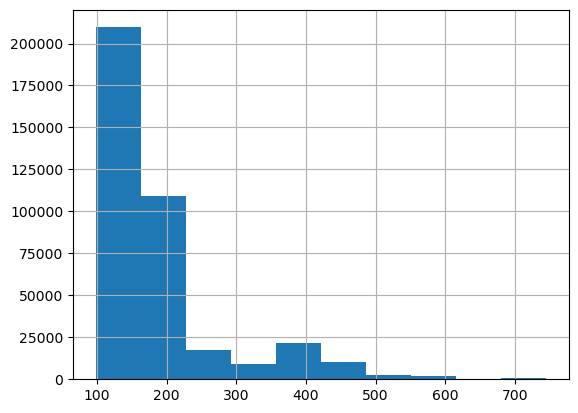

In [120]:
renfe_df['tiempo_de_viaje'].hist()


## P9: Extrae el día, el nombre del día, el mes y la hora de `fecha_inicio`

In [36]:
#extrancción del día:
renfe_df['dia_fecha_inicio']=renfe_df['fecha_inicio'].dt.day

In [37]:
#extrancción del nombre del día:
renfe_df['dia_semana_fecha_inicio']= renfe_df['fecha_inicio'].dt.day_name()

In [38]:
#extrancción del mes:
renfe_df['mes_fecha_inicio'] = renfe_df['fecha_inicio'].dt.month

In [39]:
#extrancción de la hora:
renfe_df['hora_fecha_inicio'] = renfe_df['fecha_inicio'].dt.hour

In [40]:
renfe_df.head()

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_de_viaje,dia_fecha_inicio,dia_semana_fecha_inicio,mes_fecha_inicio,hora_fecha_inicio
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,28,Friday,6,20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,14,Sunday,7,10
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,23,Thursday,5,13
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,29,Wednesday,5,14
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,26,Wednesday,6,13


## P10: Quita las columnas `fecha_consulta`, `fecha_inicio` y `fecha_fin` del dataset

In [41]:
renfe_df.drop(['fecha_consulta','fecha_inicio','fecha_fin'],axis=1,inplace=True)

In [42]:
renfe_df.columns

Index(['ciudad_origen', 'ciudad_destino', 'tipo_tren', 'tipo_tarifa', 'clase',
       'precio', 'tiempo_de_viaje', 'dia_fecha_inicio',
       'dia_semana_fecha_inicio', 'mes_fecha_inicio', 'hora_fecha_inicio'],
      dtype='object')

## P11: Lee el dataset `coordenadas_ciudades.csv` y únelo con al dataset que has procesado hasta ahora (utiliza `ciudad_destino` para el `join`)

In [43]:
coordenadas_ciudades = pd.read_csv('coordenadas_ciudades.csv')
renfe_df_coordenadas = renfe_df.merge(coordenadas_ciudades,left_on='ciudad_destino', right_on='ciudad')
renfe_df_coordenadas.head()


,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_de_viaje,dia_fecha_inicio,dia_semana_fecha_inicio,mes_fecha_inicio,hora_fecha_inicio,ciudad,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,28,Friday,6,20,MADRID,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,14,Sunday,7,10,MADRID,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,23,Thursday,5,13,MADRID,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,29,Wednesday,5,14,MADRID,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150.0,21,Sunday,7,8,MADRID,40.416705,-3.703582


## P12: Gráfica en un mapa el precio medio por ciudad de destino

In [44]:
renfe_preciomedio_ciudades = renfe_df_coordenadas.groupby('ciudad_destino').mean('precio')[['precio','latitud','longitud']]
renfe_preciomedio_ciudades.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

In [45]:
renfe_preciomedio_ciudades

,ciudad_destino,precio,latitud,longitud
0,BARCELONA,85.360833,41.382894,2.177432
1,MADRID,60.700061,40.416705,-3.703582
2,PONFERRADA,45.650328,42.545412,-6.593872
3,SEVILLA,58.818389,37.388630,-5.995340
4,VALENCIA,42.637584,39.469901,-0.375951


In [46]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [47]:
import folium
renfe_map = folium.Map(location=[renfe_preciomedio_ciudades.latitud.mean(), renfe_preciomedio_ciudades.longitud.mean()], tiles="cartodbpositron", zoom_start=6)

for idx, row in renfe_preciomedio_ciudades.iterrows():
    folium.Circle(
        location=(row["latitud"], row["longitud"]),
        radius=row["precio"] *500,
        fill=True,
        fill_opacity=0.5,
        color="blue",
        tooltip=f"""
        <ul>
            <li>Ciudad: {row[0]}</li>
            <li>Precio Medio: {row["precio"]}</li>
        <ul>
        """
    ).add_to(renfe_map)
renfe_map

## P13: Haz una tabla de correlación, ¿hay variables númericas correladas con el precio?

In [48]:
renfe_corr = renfe_df_coordenadas.corr()
renfe_corr.style.background_gradient(cmap='coolwarm')

,precio,tiempo_de_viaje,dia_fecha_inicio,mes_fecha_inicio,hora_fecha_inicio,latitud,longitud
precio,1.000000,-0.226549,0.031131,-0.179374,0.048910,0.219981,0.238098
tiempo_de_viaje,-0.226549,1.000000,-0.005520,-0.001939,-0.183787,0.128923,-0.018864
dia_fecha_inicio,0.031131,-0.005520,1.000000,-0.292580,0.003301,0.001803,0.003051
mes_fecha_inicio,-0.179374,-0.001939,-0.292580,1.000000,-0.004581,-0.038777,-0.050877
hora_fecha_inicio,0.048910,-0.183787,0.003301,-0.004581,1.000000,-0.009968,-0.007656
latitud,0.219981,0.128923,0.001803,-0.038777,-0.009968,1.000000,0.531514
longitud,0.238098,-0.018864,0.003051,-0.050877,-0.007656,0.531514,1.000000


No hay correlaciones entre las variables numéricas.

## P14: Relación entre variables del dataset y `precio`

### P14.1: Haz un scatter plot de precio vs. tiempo de viaje

[Text(0, 0.5, 'Precio'), Text(0.5, 0, 'Tiempo de Viaje')]

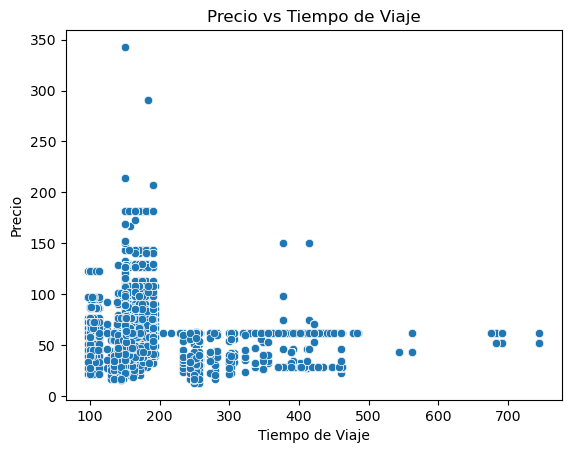

In [49]:
import seaborn as sns
g=sns.scatterplot(y='precio',x='tiempo_de_viaje',data=renfe_df)
g.set_title('Precio vs Tiempo de Viaje')
g.set(ylabel='Precio', xlabel='Tiempo de Viaje')

### P14.2: Haz un boxplot de precio vs. dia de la semana

[Text(0.5, 0, 'Precio'), Text(0, 0.5, 'Dia de la semana')]

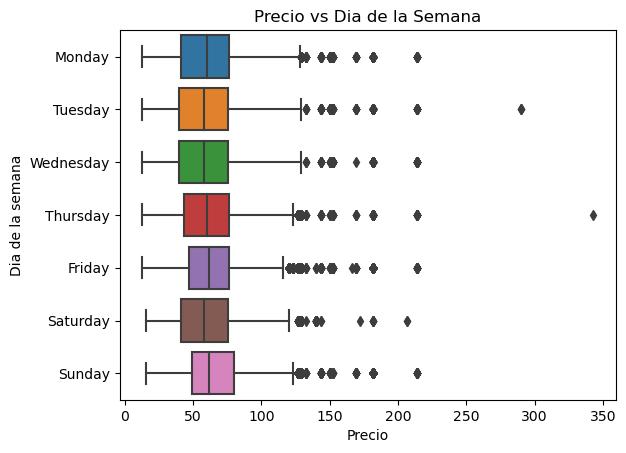

In [50]:
f=sns.boxplot(x='precio',y='dia_semana_fecha_inicio',data=renfe_df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
f.set_title('Precio vs Dia de la Semana')
f.set(xlabel='Precio', ylabel='Dia de la semana')

### P14.3: Gráfica el precio medio por día de la semana

<AxesSubplot:title={'center':'Precio medio por dia de la semana'}, xlabel='dia_semana_fecha_inicio', ylabel='Precio medio'>

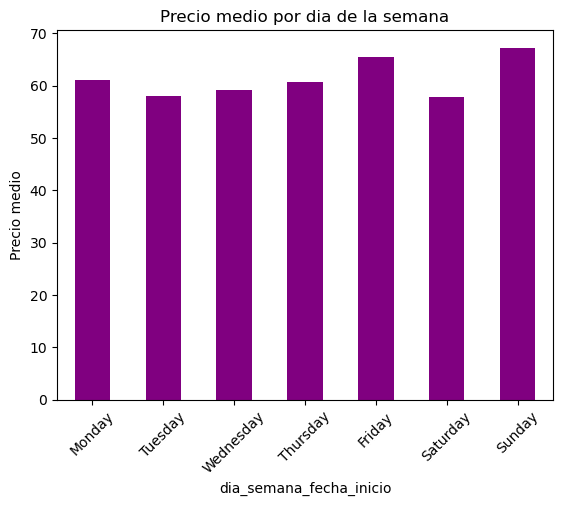

In [54]:

renfe_dia_precio_medio= renfe_df.groupby('dia_semana_fecha_inicio').mean()['precio']
renfe_dia_precio_medio=renfe_dia_precio_medio.reindex(index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
renfe_dia_precio_medio.plot(kind='bar',title='Precio medio por dia de la semana',ylabel='Precio medio',rot=45,color='purple')



## P15: Crea un nuevo dataframe donge apliques *one-hot-encoding* a las variables categoricas

In [112]:
renfe_df_prueba = renfe_df_coordenadas.copy()
renfe_df_prueba.head()


,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_de_viaje,dia_fecha_inicio,dia_semana_fecha_inicio,mes_fecha_inicio,hora_fecha_inicio,ciudad,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,28,Friday,6,20,MADRID,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,14,Sunday,7,10,MADRID,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,23,Thursday,5,13,MADRID,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,29,Wednesday,5,14,MADRID,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150.0,21,Sunday,7,8,MADRID,40.416705,-3.703582


In [102]:
!pip install scikit-learn



In [62]:
from sklearn.preprocessing import LabelEncoder


In [113]:
def label_encoder(columna, data= renfe_df_prueba):
    le = LabelEncoder()
    le.fit(data[columna]) 
    x = le.transform(data[columna])
    renfe_df_prueba[columna+'_encoded']=x
    return x  

In [114]:
columnas_categoricas = ['ciudad_origen','ciudad_destino','tipo_tren','tipo_tarifa', 'clase','dia_semana_fecha_inicio','ciudad']
for objeto in columnas_categoricas:
    label_encoder(objeto)